<a href="https://colab.research.google.com/github/Rishika70/Hack_To_Hire/blob/main/Hack_To_Hire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
!pip install huggingface

In [116]:
!pip install transformers

In [117]:
!pip install datasets transformers


In [118]:
!pip install bleu

In [167]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import BertTokenizer, BertModel
from transformers import T5Tokenizer, T5Model
from transformers import GPT2Tokenizer, GPT2Model
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu
from transformers import BertTokenizer, DataCollatorWithPadding
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
import re
import html
from collections import Counter
from transformers import TFBertForSequenceClassification, BertTokenizer, create_optimizer
import tensorflow as tf
from datasets import load_dataset




In [120]:
# Tokenize the data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [171]:
from transformers import BertTokenizer
from datasets import load_dataset
import tensorflow as tf

# Load dataset and tokenizer
# Load and split the dataset
dataset = load_dataset("toughdata/quora-question-answer-dataset")
dataset = dataset["train"].train_test_split(test_size=0.2)

# Split dataset
train_test_split = dataset['train'].train_test_split(test_size=0.1)
train_dataset = train_test_split['train']
validation_dataset = train_test_split['test']

# Tokenize datasets
def tokenize_function(examples):
    return tokenizer(examples['question'], padding='max_length', truncation=True)

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_val_dataset = validation_dataset.map(tokenize_function, batched=True)

# Convert datasets to tf.data.Dataset
def convert_to_tf_dataset(tokenized_dataset):
    def gen():
        for ex in tokenized_dataset:
            yield ({'input_ids': ex['input_ids'], 'attention_mask': ex['attention_mask']}, ex['label'])

    return tf.data.Dataset.from_generator(
        gen,
        ({'input_ids': tf.int32, 'attention_mask': tf.int32}, tf.int64),
        ({'input_ids': tf.TensorShape([None]), 'attention_mask': tf.TensorShape([None])}, tf.TensorShape([]))
    )

train_tf_dataset = convert_to_tf_dataset(tokenized_train_dataset)
val_tf_dataset = convert_to_tf_dataset(tokenized_val_dataset)

# Batch and shuffle the datasets
train_tf_dataset = train_tf_dataset.shuffle(len(tokenized_train_dataset)).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
val_tf_dataset = val_tf_dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)





Map:   0%|          | 0/40608 [00:00<?, ? examples/s]

Map:   0%|          | 0/4513 [00:00<?, ? examples/s]

#**Split the training data into train and validation sets**

In [158]:

from sklearn.model_selection import train_test_split # Import train_test_split

# Split the training data into train and validation sets (80/20)
train_df, val_df = train_test_split(train_data, test_size=0.2, random_state=42) # Use imported function

print("Train DataFrame:")
print(train_df)
print("\nValidation DataFrame:")
print(val_df)


Train DataFrame:
                                                question  \
19108    would narcissist block Facebook unblock block ?   
42672          industry need lead generation marketing ?   
45000  waitress ask Coke okay instead Pepsi ? think m...   
24717                                  hotel used soap ?   
36445              http : //www.quora.com/profile/Me ...   
...                                                  ...   
52710          get goat chicken ? want companion human .   
19738          Bangladesh powerful prosperous Pakistan ?   
7354    encryption much easier decryption cryptography ?   
16511                                       JFK affair ?   
43377                  tip new competitive programming ?   

                                                  answer  
19108  believe narcissist would block unblock differe...  
42672  Lead generation marketing essential wide range...  
45000  absolutely make difference . ’ care Pepsi . ’ ...  
24717                     

# Pre-Processing

Clean the text


In [159]:
import re

def clean_text(text):
  # Remove special characters and numbers
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  # Convert to lowercase
  text = text.lower()
  # Remove extra whitespace
  text = text.strip()
  return text

# Apply clean_text function to 'question' and 'answer' columns in train_df
train_df['question'] = train_df['question'].apply(clean_text)
train_df['answer'] = train_df['answer'].apply(clean_text)

# Apply clean_text function to 'question' and 'answer' columns in val_df
val_df['question'] = val_df['question'].apply(clean_text)
val_df['answer'] = val_df['answer'].apply(clean_text)

print("Cleaned Train DataFrame:")
print(train_df.head())
print("\nCleaned Validation DataFrame:")
print(val_df.head())

Cleaned Train DataFrame:
                                                question  \
19108      would narcissist block facebook unblock block   
42672            industry need lead generation marketing   
45000  waitress ask coke okay instead pepsi  think ma...   
24717                                    hotel used soap   
36445                         http  wwwquoracomprofileme   

                                                  answer  
19108  believe narcissist would block unblock differe...  
42672  lead generation marketing essential wide range...  
45000  absolutely make difference   care pepsi   drin...  
24717                                     probably trash  
36445                  accessed quora website firefox pc  

Cleaned Validation DataFrame:
                                                question  \
44897  nt elite soldier navy seals physique like dway...   
22987                                       headless cms   
44259                 screenshots deserves  billi

# Lemmatization




In [127]:


def lemmatize_text(text):
  tokens = word_tokenize(text)
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return ' '.join(lemmatized_tokens)

# Apply lemmatize_text function to 'question' and 'answer' columns in train_df
train_df['question'] = train_df['question'].apply(lemmatize_text)
train_df['answer'] = train_df['answer'].apply(lemmatize_text)

# Apply lemmatize_text function to 'question' and 'answer' columns in val_df
val_df['question'] = val_df['question'].apply(lemmatize_text)
val_df['answer'] = val_df['answer'].apply(lemmatize_text)

print("Lemmatized Train DataFrame:")
print(train_df.head())
print("\nLemmatized Validation DataFrame:")
print(val_df.head())

Lemmatized Train DataFrame:
                                                question  \
19108      would narcissist block facebook unblock block   
42672            industry need lead generation marketing   
45000  waitress ask coke okay instead pepsi think mak...   
24717                                    hotel used soap   
36445                          http wwwquoracomprofileme   

                                                  answer  
19108  believe narcissist would block unblock differe...  
42672  lead generation marketing essential wide range...  
45000  absolutely make difference care pepsi drink pr...  
24717                                     probably trash  
36445                  accessed quora website firefox pc  

Lemmatized Validation DataFrame:
                                                question  \
44897  nt elite soldier navy seal physique like dwayn...   
22987                                        headless cm   
44259                  screenshots deserves

# Text Encoding/Vectorization

# TF-IDF

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Assuming train_df and val_df are your DataFrames with 'question' and 'answer' columns

# Combine questions and answers for vectorization
train_texts = train_df['question'].tolist() + train_df['answer'].tolist()
val_texts = val_df['question'].tolist() + val_df['answer'].tolist()

# Ensure all elements in the lists are strings
train_texts = [str(text) for text in train_texts]  # Convert any non-string elements to strings
val_texts = [str(text) for text in val_texts]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform both training and validation data
train_tfidf = vectorizer.fit_transform(train_texts)
val_tfidf = vectorizer.transform(val_texts)

# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

print("Shape of Train TF-IDF Matrix:", train_tfidf.shape)
print("Shape of Validation TF-IDF Matrix:", val_tfidf.shape)
print("\nFeature Names:")
print(feature_names)

Shape of Train TF-IDF Matrix: (72192, 122112)
Shape of Validation TF-IDF Matrix: (18050, 122112)

Feature Names:
['aa' 'aaa' 'aaaa' ... 'zztno' 'zzz' 'zzzzzzzzzzzzz']


# Padding/Truncation

In [129]:



def tokenize_function(examples):
    return tokenizer(
        examples["question"],
        examples["answer"],
        truncation=True,
        padding="max_length",  # Add padding
        max_length=128,       # Set a maximum length for truncation and padding
    )

tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["question", "answer"])


Map:   0%|          | 0/56402 [00:00<?, ? examples/s]

# **Data Augmentation**

 # Paraphrasing

In [160]:


!pip install nlpaug
import nlpaug.augmenter.word as naw

# Initialize a synonym augmenter
aug = naw.SynonymAug(aug_src='wordnet')

# Function to paraphrase text
def paraphrase_text(text):
  augmented_text = aug.augment(text)
  return augmented_text

# Apply paraphrasing to 'question' column in train_df
train_df['question'] = train_df['question'].apply(paraphrase_text)

print("Paraphrased Train DataFrame:")
print(train_df.head())


Paraphrased Train DataFrame:
                                                question  \
19108  [would narcissist cylinder block facebook unbl...   
42672   [manufacture need lead multiplication marketing]   
45000  [waitress ask coke hunky dory instead pepsi th...   
24717                                   [hotel use soap]   
36445  [hypertext transfer protocol wwwquoracomprofil...   

                                                  answer  
19108  believe narcissist would block unblock differe...  
42672  lead generation marketing essential wide range...  
45000  absolutely make difference   care pepsi   drin...  
24717                                     probably trash  
36445                  accessed quora website firefox pc  


# **Model Evaluation**

In [139]:
import warnings
warnings.filterwarnings("ignore")

In [134]:
# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
# Use BertModel instead of BertForSequenceClassification for extracting embeddings
model = BertModel.from_pretrained(model_name)

# Tokenize and encode input data (example using the first question in train_df)
inputs = tokenizer(train_df['question'].iloc[0], return_tensors='pt')

# Forward pass through the model
outputs = model(**inputs)

# Extract embeddings (e.g., last hidden state)
embeddings = outputs.last_hidden_state

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [177]:


import plotly.express as px

# Assuming 'embeddings' is a tensor of shape (batch_size, sequence_length, hidden_size)
# We'll visualize the embeddings of the first token in the sequence
token_embeddings = embeddings[0, 0, :].detach().numpy()

# Create a scatter plot
fig = px.scatter(x=range(len(token_embeddings)), y=token_embeddings,
                 labels={'x': 'Embedding Dimension', 'y': 'Value'},
                 title='BERT Embeddings for the First Token')

fig.show()


Line plot


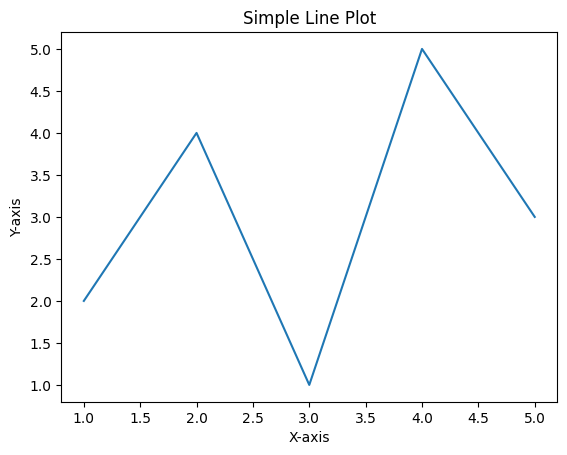

In [178]:


# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Line Plot')

# Display the plot
plt.show()

# Evaluate metrices and loss functions

In [181]:
import tensorflow as tf
from sklearn.metrics import f1_score

# Assuming you have predictions and true labels
# Replace 'y_pred' and 'y_true' with your actual data
y_pred = [0, 1, 1, 0, 1]  # Example predictions
y_true = [1, 1, 0, 0, 1]  # Example true labels

# Calculate F1-score
f1 = f1_score(y_true, y_pred)
print("F1-score:", f1)

# Convert lists to tensors of floats
y_true = tf.constant(y_true, dtype=tf.float32)
y_pred = tf.constant(y_pred, dtype=tf.float32)

# Calculate binary cross-entropy loss (assuming binary classification)
bce = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred).numpy()
print("Binary Cross-Entropy Loss:", bce)


F1-score: 0.6666666666666666
Binary Cross-Entropy Loss: 6.151637


# **STATE-OF-THE-ART**

# GPT Model

# Retriever

In [ ]:
# Load pre-trained GPT model and tokenizer
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name)

# Tokenize and encode input data (example using the first answer in train_df)
inputs = tokenizer(train_df['answer'].iloc[0], return_tensors='pt')

# Forward pass through the model
outputs = model(**inputs)

# Extract embeddings (e.g., last hidden state)
embeddings = outputs.last_hidden_state


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained GPT-2 model and tokenizer
model_name = 'gpt2'  # You can choose a different GPT-2 variant if needed
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

def generate_text(prompt, max_length=50):
    input_ids = tokenizer.encode(prompt, return_tensors='pt')
    attention_mask = torch.ones(input_ids.shape, dtype=torch.long)  # Create attention mask

    output = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_length=max_length,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        temperature=0.7
    )

    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Generator

In [ ]:

question_prompt = "Generate a question about: " + train_df['answer'].iloc[0]
generated_question = generate_text(question_prompt)
print("Generated Question:", generated_question)

# Assuming train_df['question'] contains lists and you want the first element of the first list
answer_prompt = "Generate an answer for: " + ' '.join(train_df['question'].iloc[0]) # Join list elements into a string
generated_answer = generate_text(answer_prompt)
print("Generated Answer:", generated_answer)

# Data Visualization


Scatter Plot

In [ ]:


# Assuming 'embeddings' is a tensor of shape (batch_size, sequence_length, hidden_size)
# We'll visualize the embeddings of the first token in the sequence
token_embeddings = embeddings[0, 0, :].detach().numpy()

# Create a scatter plot
fig = px.scatter(x=range(len(token_embeddings)), y=token_embeddings,
                 labels={'x': 'Embedding Dimension', 'y': 'Value'},
                 title='GPT Embeddings for the First Token')

fig.show()


Line Plot


In [ ]:


# Assuming 'embeddings' is a tensor of shape (batch_size, sequence_length, hidden_size)
# We'll visualize the embeddings of the first token in the sequence across all dimensions
token_embeddings = embeddings[0, 0, :].detach().numpy()

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(token_embeddings)
plt.xlabel('Embedding Dimension')
plt.ylabel('Value')
plt.title('GPT Embeddings for the First Token')
plt.grid(True)
plt.show()


# **T5 Model**

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Load pre-trained T5 model and tokenizer
model_name = 't5-small'  # You can choose a different T5 variant if needed
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

Generator

In [ ]:
# Define a function for generating text using T5
def generate_text_t5(prompt, max_length=50):
    inputs = tokenizer(prompt, return_tensors='pt', padding=True, truncation=True, max_length=128)

    summary_ids = model.generate(
        inputs.input_ids,
        attention_mask=inputs.attention_mask,
        max_length=max_length,
        num_beams=4,
        early_stopping=True
    )

    generated_text = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return generated_text

Retriever

In [ ]:
question_prompt = "Generate a question about: " + train_df['answer'].iloc[0]
generated_question = generate_text_t5(question_prompt)
print("Generated Question (T5):", generated_question)

answer_prompt = "Generate an answer for: " + ' '.join(train_df['question'].iloc[0])
generated_answer = generate_text_t5(answer_prompt)
print("Generated Answer (T5):", generated_answer)

# Data Visualization

Scatter Plot

In [ ]:


# Create a scatter plot
fig = px.scatter(x=range(len(token_embeddings)), y=token_embeddings,
                 labels={'x': 'Embedding Dimension', 'y': 'Value'},
                 title='T5 Embeddings for the First Token')

fig.show()

Line Plot

In [ ]:
# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Line Plot')

# Display the plot
plt.show()


In [ ]:
# prompt: Implement train

from transformers import TrainingArguments, Trainer

# Define training arguments
training_args = TrainingArguments(
    output_dir="./output",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    logging_dir='./logs',
    learning_rate=2e-5,
    weight_decay=0.01,
)

# Initialize Trainer
trainer = Trainer(
    model=model,  # Replace with your chosen model
    args=training_args,
    train_dataset=train_dataset,  # Replace with your training dataset
    eval_dataset=test_dataset,  # Replace with your validation dataset
)

# Start training
trainer.train()


In [ ]:
# prompt: # # generated_questions_gpt, generated_answers_gpt (for GPT model)
# # # generated_questions_t5, generated_answers_t5 (for T5 model)

# For GPT Model
generated_questions_gpt = []
generated_answers_gpt = []

for i in range(len(train_df)):
  question_prompt = "Generate a question about: " + train_df['answer'].iloc[i]
  generated_question = generate_text(question_prompt)
  generated_questions_gpt.append(generated_question)

  answer_prompt = "Generate an answer for: " + ' '.join(train_df['question'].iloc[i])
  generated_answer = generate_text(answer_prompt)
  generated_answers_gpt.append(generated_answer)

# For T5 Model
generated_questions_t5 = []
generated_answers_t5 = []

for i in range(len(train_df)):
  question_prompt = "Generate a question about: " + train_df['answer'].iloc[i]
  generated_question = generate_text_t5(question_prompt)
  generated_questions_t5.append(generated_question)

  answer_prompt = "Generate an answer for: " + ' '.join(train_df['question'].iloc[i])
  generated_answer = generate_text_t5(answer_prompt)
  generated_answers_t5.append(generated_answer)


In [ ]:
# prompt: # Assuming you have generated questions and answers using your models and stored them in variables like:
# # generated_questions_gpt, generated_answers_gpt (for GPT model)
# # generated_questions_t5, generated_answers_t5 (for T5 model)

# Assuming you have generated questions and answers and stored them in variables:
# generated_questions_gpt, generated_answers_gpt (for GPT model)
# generated_questions_t5, generated_answers_t5 (for T5 model)

# Example usage (replace with your actual variables):
generated_questions_gpt = ["Generated question 1 from GPT", "Generated question 2 from GPT"]
generated_answers_gpt = ["Generated answer 1 from GPT", "Generated answer 2 from GPT"]
generated_questions_t5 = ["Generated question 1 from T5", "Generated question 2 from T5"]
generated_answers_t5 = ["Generated answer 1 from T5", "Generated answer 2 from T5"]

# Evaluate GPT-generated questions and answers using ROUGE
rouge_scores_gpt_questions = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores_gpt_answers = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

for i in range(len(generated_questions_gpt)):
    # Assuming you have reference questions and answers in val_df
    reference_question = val_df['question'].iloc[i]
    reference_answer = val_df['answer'].iloc[i]

    scores_question = rouge_scores_gpt_questions.score(reference_question, generated_questions_gpt[i])
    scores_answer = rouge_scores_gpt_answers.score(reference_answer, generated_answers_gpt[i])

    print(f"GPT - Question {i+1} ROUGE Scores:", scores_question)
    print(f"GPT - Answer {i+1} ROUGE Scores:", scores_answer)

# Evaluate T5-generated questions and answers using ROUGE
rouge_scores_t5_questions = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores_t5_answers = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

for i in range(len(generated_questions_t5)):
    # Assuming you have reference questions and answers in val_df
    reference_question = val_df['question'].iloc[i]
    reference_answer = val_df['answer'].iloc[i]

    scores_question = rouge_scores_t5_questions.score(reference_question, generated_questions_t5[i])
    scores_answer = rouge_scores_t5_answers.score(reference_answer, generated_answers_t5[i])

    print(f"T5 - Question {i+1} ROUGE Scores:", scores_question)
    print(f"T5 - Answer {i+1} ROUGE Scores:", scores_answer)
